# Create


In [1]:
import numpy as np
import syndat
import pandas as pd
import os
from matplotlib.pyplot import *


In [2]:
%matplotlib widget

In [3]:
ac = 8.1271e-15 # scattering radius in m 
M = 180.948030  # amu of target nucleus
m = 1           # amu of incident neutron
I = 3.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity
l_max = 0       # highest order l-wave to consider

pair = syndat.particle_pair(ac, M, m, I, i, l_max)

pair.map_quantum_numbers(True)



The following arrays describe all possible spin groups for a each parity.
    The data is given as a tuple where the first value is the integer 
    or half integer total quantum spin J and the second value is the 
    number of entrance channels for that spin group. 
    * See the dictionary "possible_Jpi" for a nested packing structure.

Spin group data for negative parity
(J-, #Chs, l-waves)

Spin group data for positive parity
(J+, #Chs, l-waves)
(3.0, 1, [0.0])
(4.0, 1, [0.0])


In [4]:

# test = [len(Davg[1]), len(Ggavg[1]), len(Gnavg[1])]
# # if any(test) != 2:
# #     print('fail')

# any(each != len(pair.Jp) for each in test)




In [5]:

average_parameters, parameters = syndat.sammy_interface.read_SAMNDF_PAR('../synthetic_data/Ta181/SAMQUA.PAR')
# print(average_parameters);# print(parameters)

RRR_Erange = [10, 100]

# size of these averages must be the same size as Jpi mapping!
Davg = [list(), list([average_parameters.dE[1],average_parameters.dE[2]])]
Ggavg = [list(), list([average_parameters.Gg[1],average_parameters.Gg[2]])]
Gnavg = [list(), list([average_parameters.Gn[1],average_parameters.Gn[2]])]

pair.sample_all_Jpi(RRR_Erange, 
                        Davg, Ggavg, Gnavg,
                        save_csv = True, 
                        sammy_run_folder = os.getcwd())

No average level spacing given for negative parity spin groups


In [6]:
print(pair.Jp_resonances[0])

            E          Gg         0
0   26.960300  103.340824  0.027301
1   46.641161  159.478456  0.000986
2   58.996424  182.017038  1.149757
3   67.203720  164.885636  0.341038
4   78.213087  209.734213  1.621721
5   84.033945  218.723025  1.180247
6   89.392909  209.085581  0.433257
7   90.637943  196.156436  0.096551
8   93.185457  197.297664  0.468804
9  104.066917  160.331485  0.000017


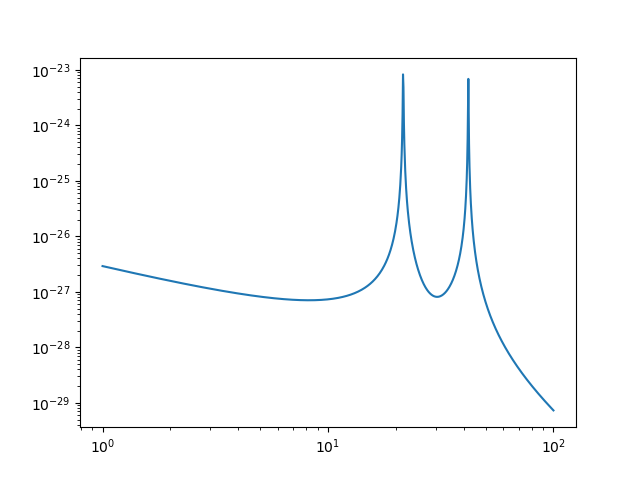

In [8]:



E = np.linspace(1,100,1000)

resonance_ladder = pair.Jp_resonances[0]
resonance_ladder = pd.DataFrame({'E':[21.54920000,41.91070000], 'Gg':[82.0092930,124.412524], '0':[0.23514800,0.25549100]}) # 


g = syndat.scattering_theory.g(pair.Jp[0][0],pair.I,pair.i)

k = syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)

myxs = syndat.scattering_theory.SLBW_capture(g,k,E,resonance_ladder)

figure()
plot(E, myxs)
xscale('log'); yscale('log')
